# Import Library

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load Dataset

In [43]:
data = fetch_california_housing(as_frame=True)
df = data.frame

# EDA

In [44]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [46]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [47]:
df.shape

(20640, 9)

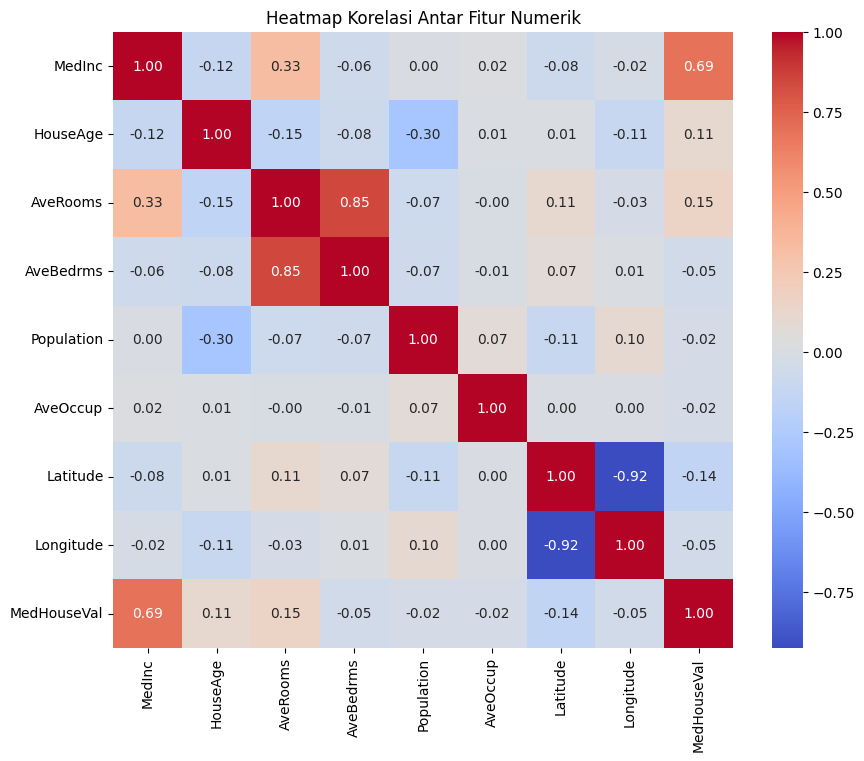

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

# Check Null Data & Duplicated Data

In [49]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [50]:
df.duplicated().sum()

np.int64(0)

# Handle Outlier

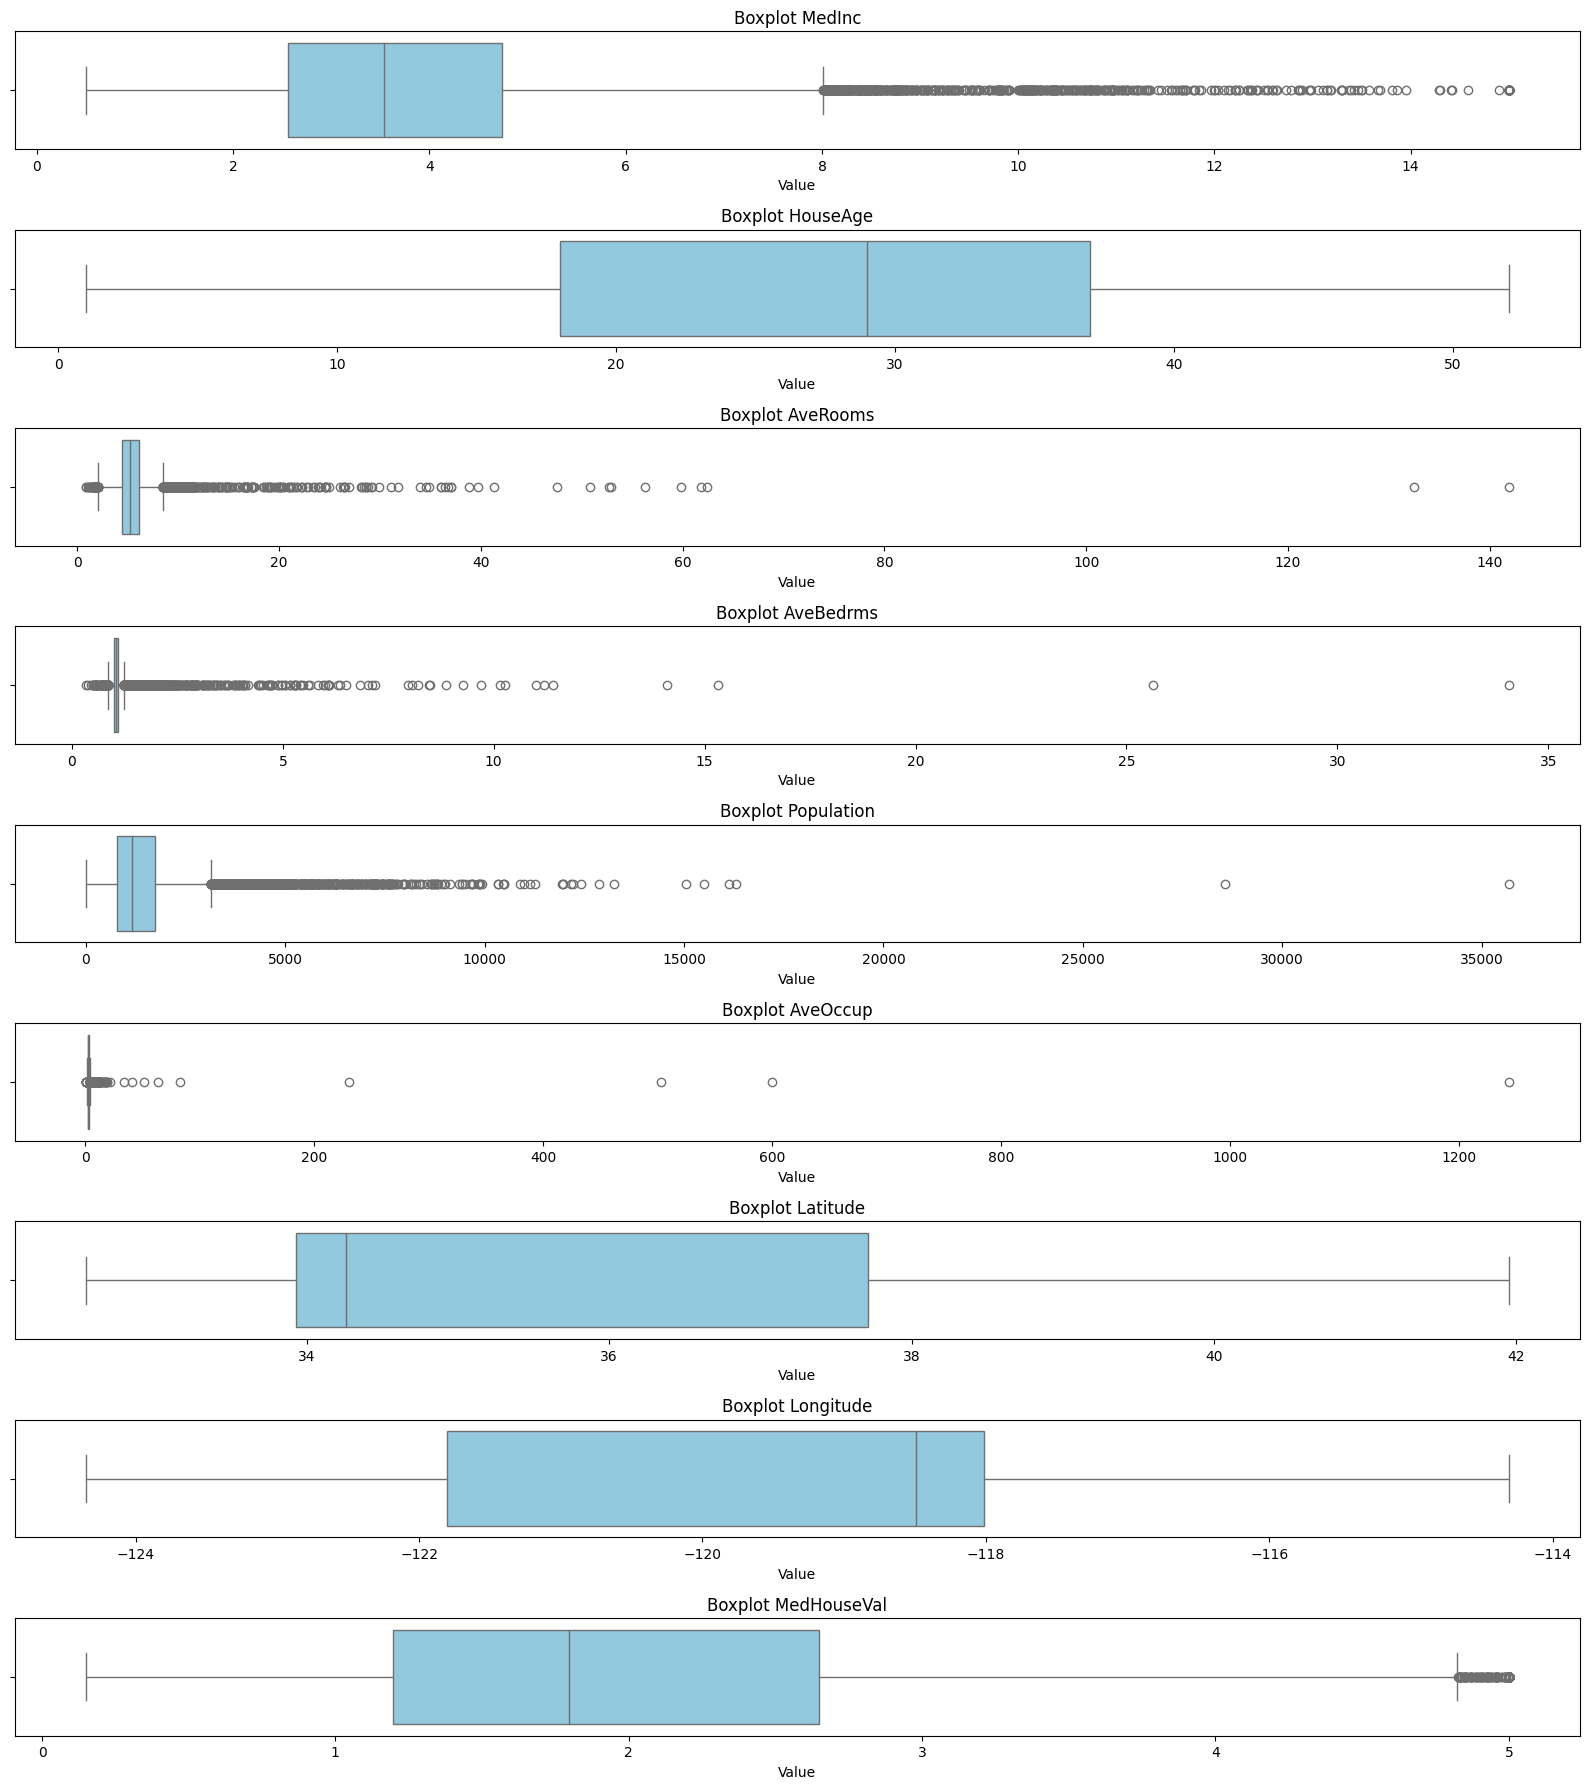

In [51]:
df_numeric = df.select_dtypes(include=np.number)
num_cols = df_numeric.columns
plt.figure(figsize=(16, 2 * len(num_cols)))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=df_numeric[col], color="skyblue")
    plt.title(f"Boxplot {col}")
    plt.xlabel("Value")
    plt.tight_layout()

plt.show()

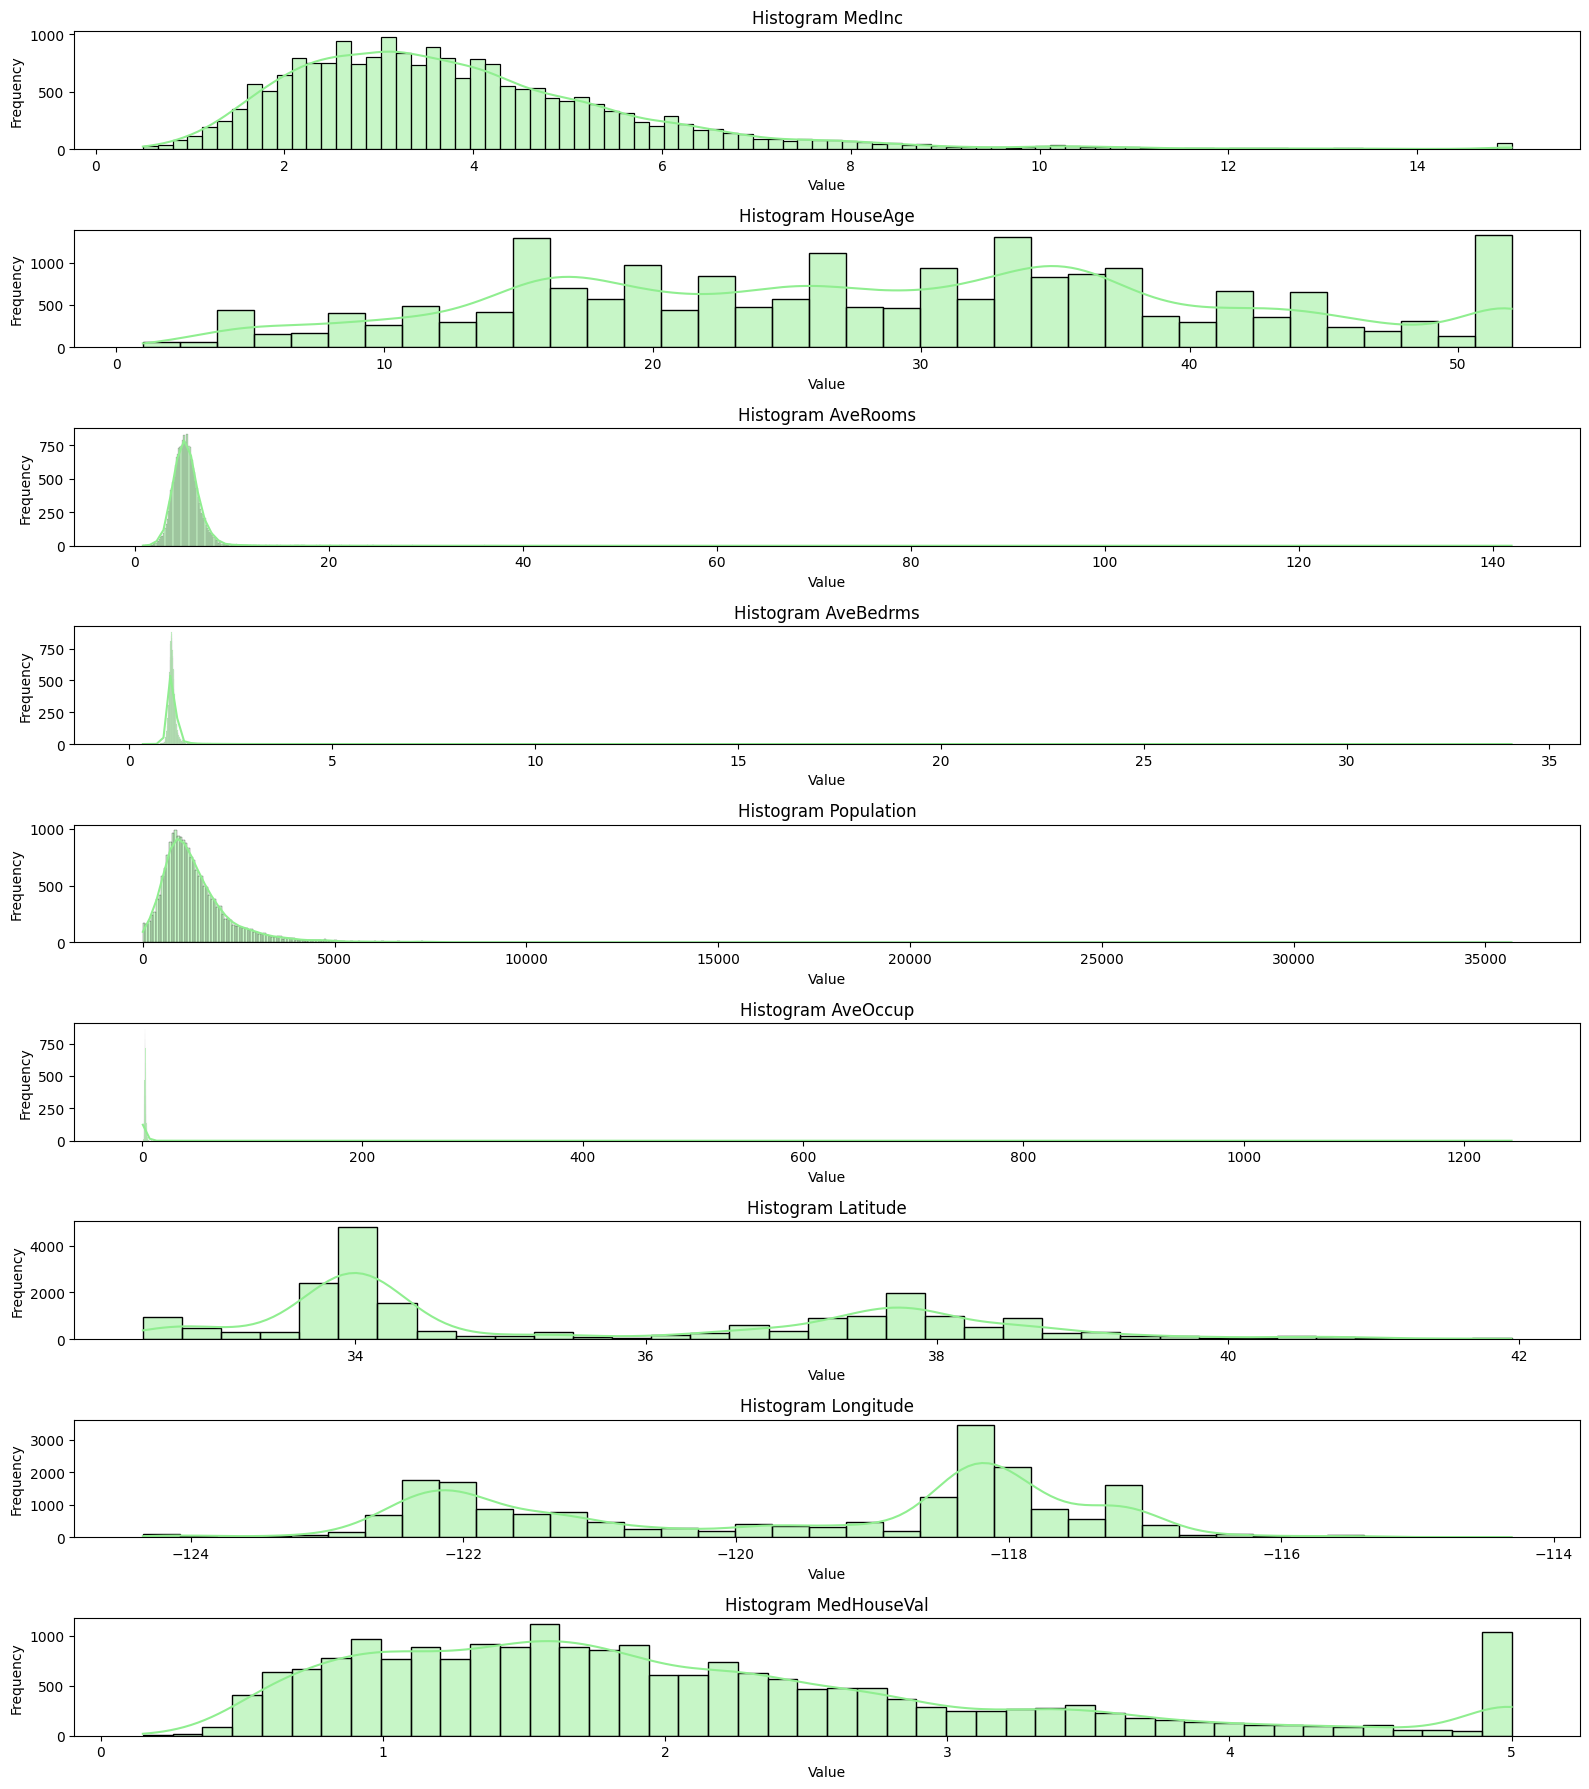

In [52]:
df_numeric = df.select_dtypes(include=np.number)
num_cols = df_numeric.columns
plt.figure(figsize=(16, 2 * len(num_cols)))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.histplot(df_numeric[col], kde=True, color="lightgreen")
    plt.title(f"Histogram {col}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

In [53]:
from scipy.stats.mstats import winsorize

df_numeric = df.select_dtypes(include=np.number)
df_winsor = df_numeric.copy()

for col in df_numeric.columns:
    df_winsor[col] = winsorize(df_numeric[col], limits=[0.05, 0.05])

df[df_winsor.columns] = df_winsor

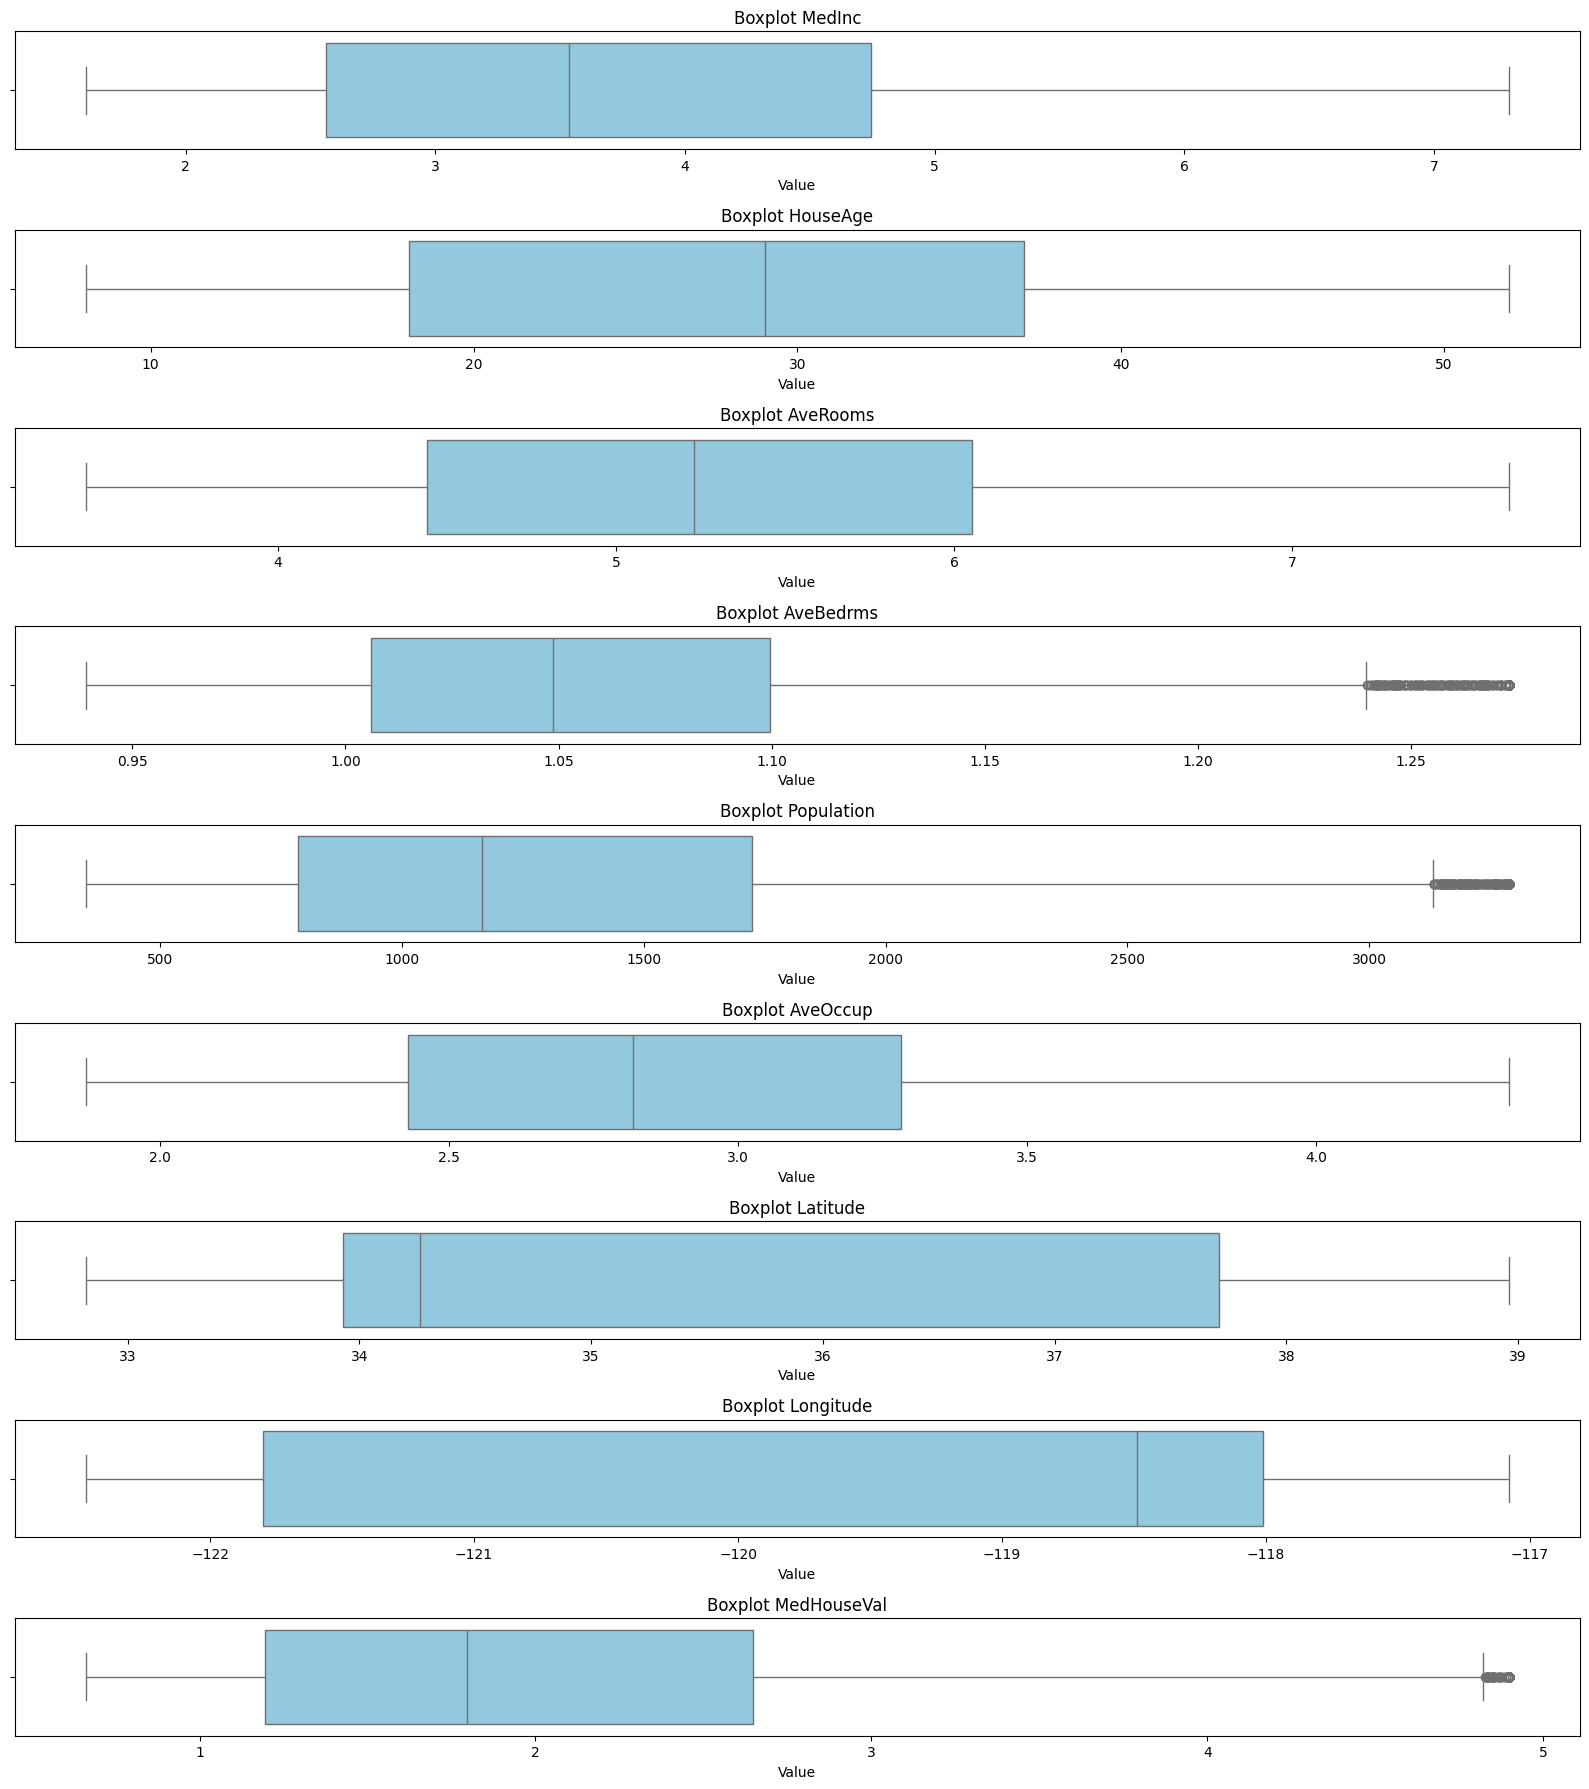

In [54]:
df_numeric = df.select_dtypes(include=np.number)
num_cols = df_numeric.columns
plt.figure(figsize=(16, 2 * len(num_cols)))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=df_numeric[col], color="skyblue")
    plt.title(f"Boxplot {col}")
    plt.xlabel("Value")
    plt.tight_layout()

plt.show()

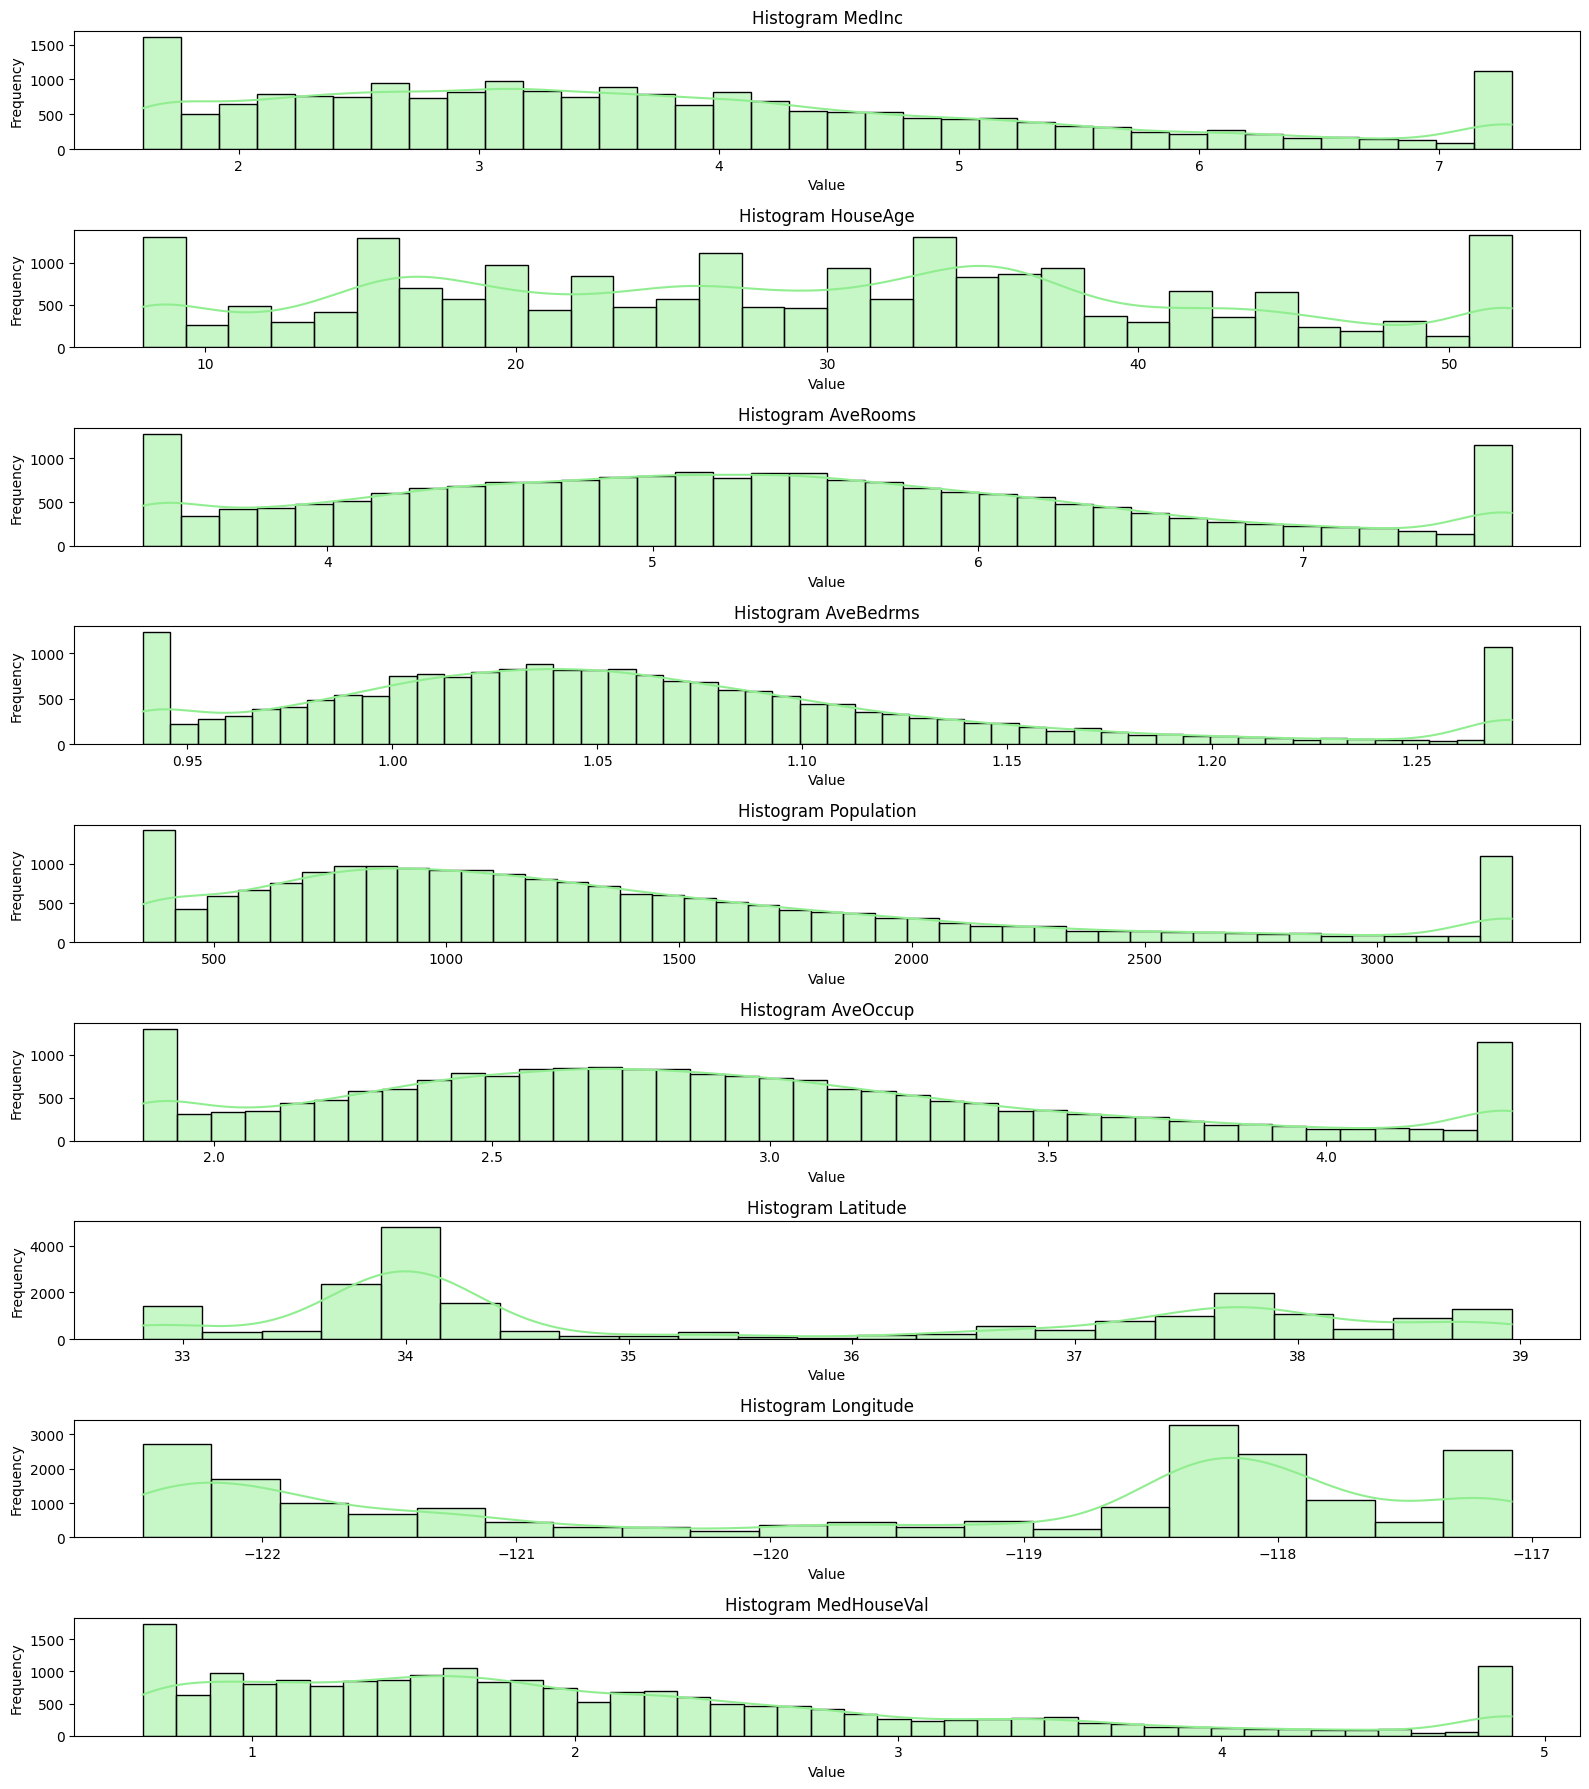

In [55]:
df_numeric = df.select_dtypes(include=np.number)
num_cols = df_numeric.columns
plt.figure(figsize=(16, 2 * len(num_cols)))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.histplot(df_numeric[col], kde=True, color="lightgreen")
    plt.title(f"Histogram {col}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

# Feauture Scalling

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_numeric = df.select_dtypes(include=np.number)
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

df[df_scaled.columns] = df_scaled

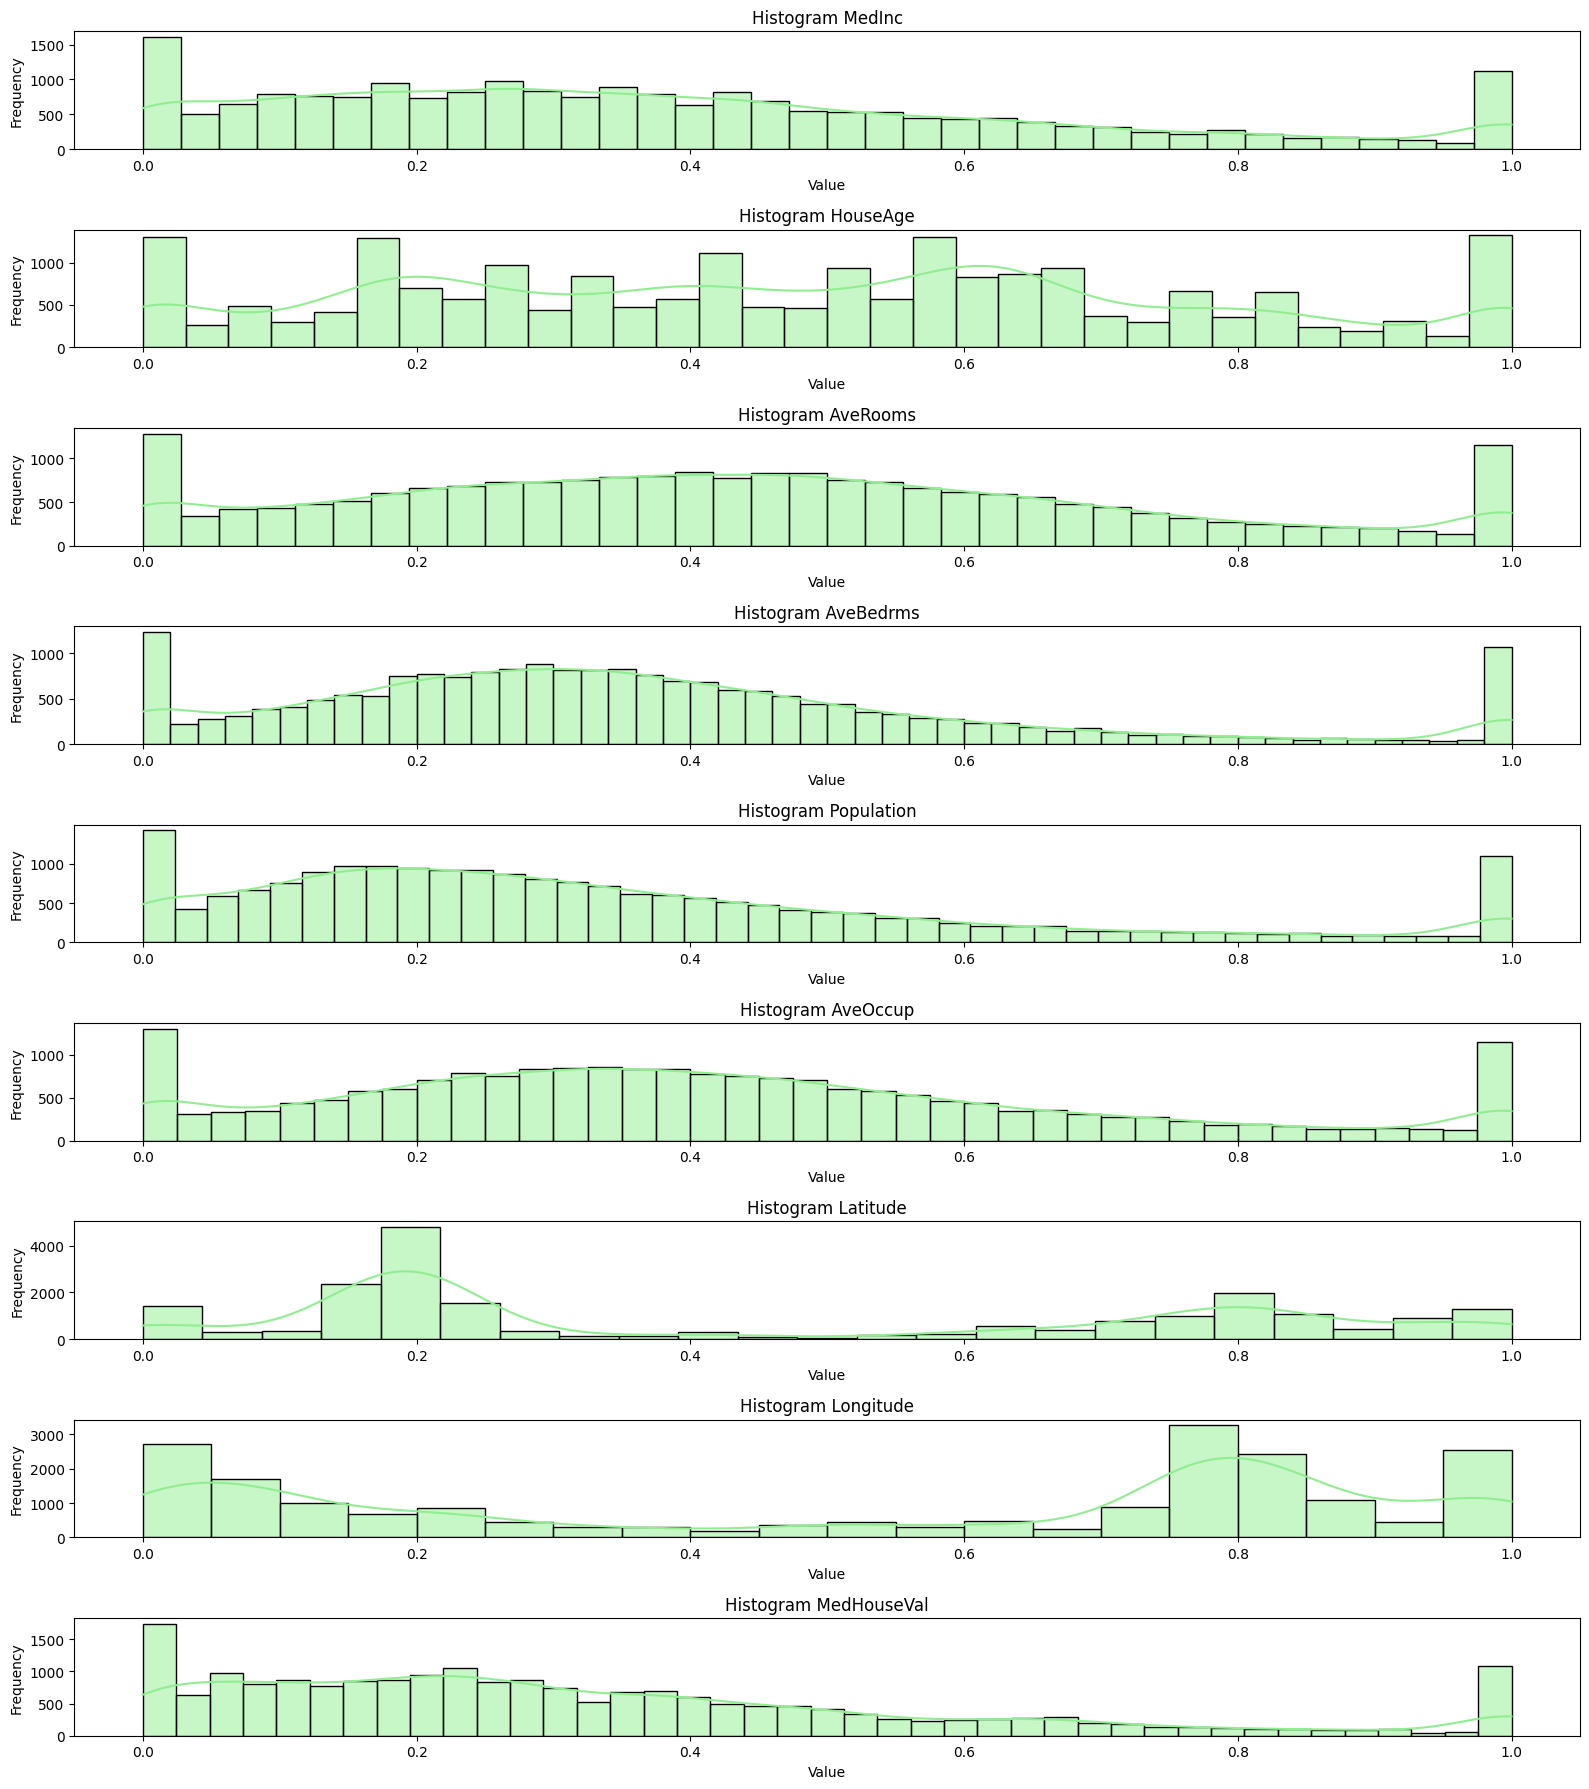

In [57]:
df_numeric = df.select_dtypes(include=np.number)
num_cols = df_numeric.columns
plt.figure(figsize=(16, 2 * len(num_cols)))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.histplot(df_numeric[col], kde=True, color="lightgreen")
    plt.title(f"Histogram {col}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

# Split Data

In [58]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling - Linear Regression

In [59]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lr = linreg.predict(X_test)

# Modelling - Random Forrest

In [60]:
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation

In [62]:
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print()
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Linear Regression R²: 0.6411181436653293
Random Forest R²: 0.8005539387240567

Linear Regression RMSE: 0.15921176644033921
Random Forest RMSE: 0.11868945662161488


/var/folders/qk/vt03qgxx57d2nf96qtx8rwpr0000gn/T/ipykernel_74111/2301889217.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



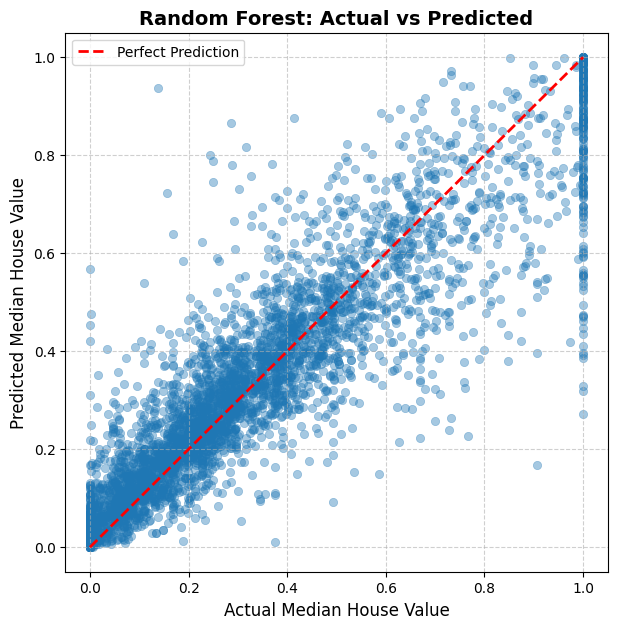

In [67]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.4, palette="viridis", edgecolor=None)

max_val = max(y_test.max(), y_pred_rf.max())
min_val = min(y_test.min(), y_pred_rf.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Perfect Prediction")

plt.xlabel("Actual Median House Value", fontsize=12)
plt.ylabel("Predicted Median House Value", fontsize=12)
plt.title("Random Forest: Actual vs Predicted", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


/var/folders/qk/vt03qgxx57d2nf96qtx8rwpr0000gn/T/ipykernel_74111/1434333385.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




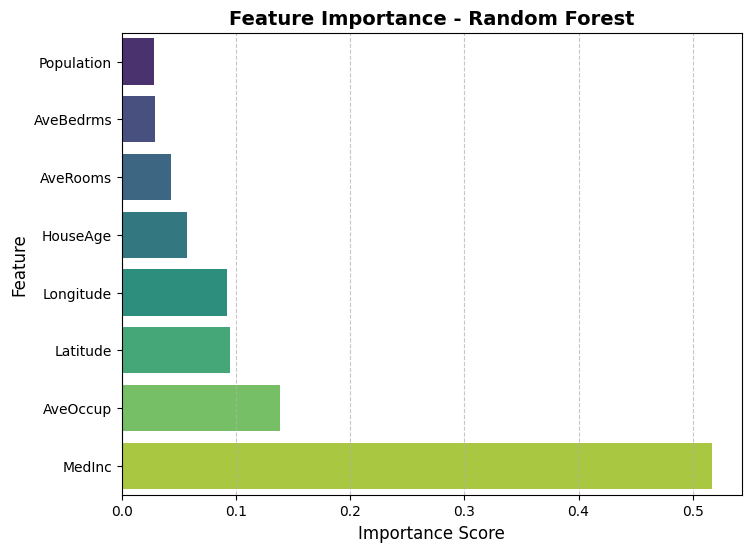

In [68]:
importances = rf.feature_importances_
feat_names = X.columns
feat_importances = pd.Series(importances, index=feat_names).sort_values(ascending=True)

plt.figure(figsize=(8,6))
sns.barplot(x=feat_importances, y=feat_importances.index, palette="viridis")

plt.title("Feature Importance - Random Forest", fontsize=14, fontweight="bold")
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()